![DSL_logo](dsl_logo.png)

# Introduction to Machine Learning with Python


In [part 2](https://brockdsl.github.io/Python_2.0_Workshop/) we introduced some data science concepts by looking at some fictional data how people that were sick. In this session we are going to see if we can build a machine learning model to see if we can predict who has the illness based on the answers to some questions. We'll also look at two new examples that try to guess the quality of wine.



## First, a brief recap

The following code should look familiar to you

In [1]:
import pandas as pd

#Load the file into a dataframe using the pandas read_csv function
data = pd.read_csv("https://brockdsl.github.io/Python_2.0_Workshop/canadian_toy_dataset.csv")

#Tell it what our columns are by passing along a list of that information
data.columns = ["city","gender","age","income","ill"]

print("Ill or not?")
print(data.groupby("ill")["city"].count())
print("\nTotal records:", len(data))


Ill or not?
ill
No     137861
Yes     12139
Name: city, dtype: int64

Total records: 150000


## Machine Learning Basics

Don't let the impressive name fool you. Machine learning is more or less the following steps

1. Getting your data and cleaning it up
1. Identify what parts of your data are **features**
1. Identify what is your **target variable** that you'll guess based on your features
1. Split your data in **training and testing sets**
1. **Train** your model against the training set
1. **Validate** your model against the testing set
1. ????
1. Profit


We are going to use the Python library [scikit-learn](https://scikit-learn.org/stable/) and we are going to be doing a [classification](https://en.wikipedia.org/wiki/Statistical_classification) problem.

![classification](https://raw.githubusercontent.com/BrockDSL/Machine_Learning_with_Python/master/classification.png)


## Decision Tree

This is the most basic machine learning model you can use. It is considered a [supervised learning](https://en.wikipedia.org/wiki/Supervised_learning) method. You create the best [decision tree](https://en.wikipedia.org/wiki/Decision_tree_learning) that you can based on your training data. Here's an example tree that shows your chance of surviving the Titanic disaster.

![dtree](https://upload.wikimedia.org/wikipedia/commons/e/eb/Decision_Tree.jpg)

``sibsp`` - is the number of spouses or siblings on board


Let's start by loading the Libraries we need

In [2]:

#This should look familar
import pandas as pd
import numpy as np


#We'll draw a graph later on
import matplotlib.pyplot as plt

#Our 'Machine Learning pieces'
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn import tree


## Getting the data ready

Now, let's load our data. Our decision tree can only work with numbers, so we'll have to modify the columns of data that are text based.

In [3]:
data = pd.read_csv("https://brockdsl.github.io/Python_2.0_Workshop/canadian_toy_dataset.csv")
data.columns = ["city","gender","age","income","ill"]
data.head()

,city,gender,age,income,ill
0,Montreal,Male,41,40367,No
1,Montreal,Male,54,45084,No
2,Montreal,Male,42,52483,No
3,Montreal,Male,40,40941,No
4,Montreal,Male,46,50289,No


As we saw last time the data is fairly clean, we just need to represent it all as numbers instead of text labels. So that means we need to change the columns:


- `ill` - instead of a No / Yes label we'll use 0 and 1 instead
- `city` - this will break out the column into 8 different columns
- `gender` - this will break out the column into 2 different columns




In [4]:
#Instead of yes/no we'll use a 0 or 1
data["ill"].replace({"No":0, "Yes":1},inplace=True)

#We change categorical values into numeric ones using `dummies`
data = pd.get_dummies(data, columns=['city','gender'])
data.head()

,age,income,ill,city_Edmonton,city_Halifax,city_Montreal,city_Ottawa,city_Regina,city_Toronto,city_Vancouver,city_Waterloo,gender_Female,gender_Male
0,41,40367,0,0,0,1,0,0,0,0,0,0,1
1,54,45084,0,0,0,1,0,0,0,0,0,0,1
2,42,52483,0,0,0,1,0,0,0,0,0,0,1
3,40,40941,0,0,0,1,0,0,0,0,0,0,1
4,46,50289,0,0,0,1,0,0,0,0,0,0,1


The example above shows 5 entries that that come from Montreal.

In [5]:
data.tail()

,age,income,ill,city_Edmonton,city_Halifax,city_Montreal,city_Ottawa,city_Regina,city_Toronto,city_Vancouver,city_Waterloo,gender_Female,gender_Male
149995,48,93669,0,1,0,0,0,0,0,0,0,0,1
149996,25,96748,0,1,0,0,0,0,0,0,0,0,1
149997,26,111885,0,1,0,0,0,0,0,0,0,0,1
149998,25,111878,0,1,0,0,0,0,0,0,0,0,1
149999,37,87251,0,1,0,0,0,0,0,0,0,1,0


This example shows the last 5 entries in the dataframe that come from Edmonton. 


Now we are done the most difficult part of the process, understanding the data and getting it ready.

## Building and Running the Model

We now have our data cleaned up, and represented in a way that Scikit will be able to analyze. To be honest the most difficult part of the process is done.

We now need to split our columns in two types:
- **features** represent the data we use to build our guess
- **target variable** the thing our model hopes to guess

In [6]:
#all of the following columns are features, we'll make a list of their names
features = ["age",\
            "income",\
            "city_Edmonton",\
            "city_Halifax",\
            "city_Montreal",
            "city_Ottawa",\
            "city_Regina",\
            "city_Toronto",
            "city_Vancouver",\
            "city_Waterloo",\
            "gender_Female",\
            "gender_Male"]

X = data[features]

#We want to target the ill column
y = data.ill

We now breakup our rows of data set into two parts
- **training set** this is what is used to build the model
- **testing set** this is used to see if our guesses are correct

We'll build our decision tree using our training data!

In [7]:
#Training and test together make up 100% of the data!
test_percent = 30
train_percent = 100 - test_percent

X_train, X_test, y_train, y_test = train_test_split(X, \
                                                    y, \
                                                    test_size=test_percent/100.0,
                                                   random_state=10)

Now the interesting part, we build our model, **train** it against the **training set** and see how it **predicts** against the **testing set**

In [8]:
# Create Decision Tree classifer object
treeClass = DecisionTreeClassifier()

# Train
treeClass = treeClass.fit(X_train,y_train)

#Predict
y_pred = treeClass.predict(X_test)


Now what?

Let's see how good it predicted things!

In [9]:
metrics.accuracy_score(y_test,y_pred)

0.8458444444444444


## Making Predictions

Not bad. We can use our model to predict a guess for **ill** if we pass along all of the other parameters. Our model only tells us if someone is ill or not


In [10]:

#We'll make a fictional person with different features to see how our model predicts things
person_x = [
        70, #age
        30000, #income
        0, #city_Edmonton
        0, #city_Halifax
        0, #city_Montreal
        0, #city_Ottawa
        0, #city_Regina
        0, #city_Toronto
        0, #city_Vancouver
        1, #city_Waterloo
        0, #gender_Female
        1, #gender_Male
]

person_x = pd.DataFrame([person_x],columns=X_test.columns)

#Use the dataframe of our fictional person in our model and get our prediction
treeClass.predict_proba(person_x)



array([[1., 0.]])

## Visualizing our Decision Tree

If we wanted to we could visualize the decision tree that we get, it will be much more complex than what we see at the top of the page. For example, look at one version of the [tree](https://raw.githubusercontent.com/BrockDSL/Machine_Learning_with_Python/master/dtree.txt) that I generated.

Not the most useful but we can tell that **income level** is the most important factor to answer the question if the target person is ill or not.

In [11]:
texttree = tree.export_text(treeClass,feature_names=features)
with open("dtree.txt","w") as fout:
    fout.write(texttree)

## Tuning parameters

To make our models run better we can tweak _many, many, many_ different parameters. For example, we can vary the testing data size percentage. We'll try some different values and plot our our accuracy of our predictions.

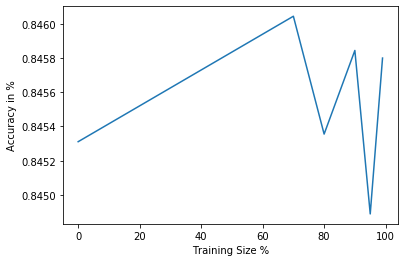

In [18]:
testing_percents = [1,5,10,20,30,100]
accuracy = []
training_percents = []

for test_ratio in testing_percents:
    X_train, X_test, y_train, y_test = train_test_split(X, \
                                                        y, \
                                                        test_size=test_percent/100.0,
                                                        random_state=10)
    treeClassTest = DecisionTreeClassifier()
    treeClassTest = treeClassTest.fit(X_train,y_train)
    y_pred = treeClassTest.predict(X_test)
    score = metrics.accuracy_score(y_test,y_pred)
    accuracy.append(score)
    training_percents.append(100 - test_ratio)

    
plt.plot(training_percents,accuracy)
plt.ylabel("Accuracy in %")
plt.xlabel("Training Size %")
plt.show()

(Your graph might look different, this is a statistical operation and will probably vary across different machines)

## Q1: Now you Try

(I'll give you 15 minutes or so to try to work through this next problem, feel free to send me a message directly or to the whole class if you need help)

We'll now try to apply what we know about decision trees. We are going to use a dataset from the [UCI machine](http://archive.ics.uci.edu/ml/datasets/Wine) learning archive. We'll start with the white wine data. This screen capture shows the details of the columns of the data:

![wine_columns](https://raw.githubusercontent.com/BrockDSL/Machine_Learning_with_Python/master/wine_columns.png)


In the chat box, what kind of classification can we do with this data?

In [ ]:
white_wine = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv",sep=';')
white_wine

What features should be in our model? What should our target be? Let's look at our dataframe columns.

In [ ]:
white_wine.columns

Try to fill in the `white_wine_features` list variable below 

In [ ]:
#fill in this list
white_wine_features = []

white_X_features = white_wine[white_wine_features]
white_X_features

In the chat box describe what our **target** should be.
Complete the assignment for `white_target` below once you have an answer

In [ ]:
#we're looking for the column name
white_target = white_wine.

Try to come up with a good testing percentage size

In [ ]:

white_test_percent =

#Split into training testing
X_white_train, X_white_test, y_white_train, y_white_test = train_test_split(white_X_features, \
                                                    white_target, \
                                                    test_size=white_test_percent/100.0,
                                                   random_state=10)



**Congratulations!!** You have done the most difficult part of a machine learning task. Understanding the data.

Let's train our model and get our predictions

In [ ]:
# Create Decision Tree classifer object
whiteTree = DecisionTreeClassifier()

# Train
whiteTree = whiteTree.fit(X_white_train,y_white_train)

#Predict
white_prediction = whiteTree.predict(X_white_test)

Let's see how accurate we are...

In [ ]:
metrics.accuracy_score(y_white_test,white_prediction)

## Q2: One more time!

(If we have time together we'll try this, if not please give it a shot on your own) Let's try the red wine data, does the classification work better? What is the best score you can get?

In [ ]:
red_wine = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",sep=';')
red_wine.columns

In [ ]:
#Set the next 3 variables and the model will run correctly

#Create this list
red_features = []

#What column do we want to target
red_target = red_wine.

#What is a good testing percentage
red_test_percent =


#Build and run our model...
red_X_features = red_wine[red_features]

#Split into training testing
X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(red_X_features, \
                                                    red_target, \
                                                    test_size=red_test_percent/100.0, \
                                                    random_state=10)

# Create Decision Tree classifer object
redTree = DecisionTreeClassifier()

# Train
redTree = redTree.fit(X_red_train,y_red_train)

#Predict
red_prediction = redTree.predict(X_red_test)

#How good is this model?
metrics.accuracy_score(y_red_test,red_prediction)

## Sizes and Scores

Let's just take a look at our data size and how good our models are

In [ ]:
#Illness data
print("")
print("Illness Data")
print("Records ",len(data))
print("Accuracy ",metrics.accuracy_score(y_test,y_pred))

#white wine data
print("")
print("White Wine Data")
print("Records ",len(white_wine))
print("Accuracy ",metrics.accuracy_score(y_white_test,white_prediction))

#red wine data
print("")
print("Red Wine Data")
print("Records ",len(red_wine))
print("Accuracy ",metrics.accuracy_score(y_red_test,red_prediction))

# Summary

We have just scratched the surface with what is possible with Python and SciKit. Remember, don't let the name **Machine Learning** fool you. Most of the time the computer is making guesses based on past data. Sometimes this works good, sometimes it doesn't work so good!

## Further Reading

- [UCI Machine Learning Archive](http://archive.ics.uci.edu/ml) A place to find good data sets that you can use to build models with